<a href="https://colab.research.google.com/github/10jsc/10jsc/blob/main/Loto_sorteio_AI_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Instalando o SDK do Google
!pip install -q -U google-generativeai

In [9]:
import google.generativeai as genai

GOOGLE_API_KEY="secret_jsc"
genai.configure(api_key=GOOGLE_API_KEY)

Os números sorteados são: [22, 21, 2, 9, 17, 5, 10, 13, 20, 6, 14, 12, 8, 24, 18]
Os números sorteados são: [8, 16, 4, 12, 17, 19, 5, 2, 20, 25, 14, 7, 6, 23, 21]

Olá! O que você deseja fazer?
1: Realizar novo sorteio
2: Analisar frequência dos números
3: Realizar sorteio com os números que mais sairam
4: Realizar sorteio com os números que menos sairam
5: Sair
Digite a opção desejada: 1
Os números sorteados são: [11, 1, 4, 21, 2, 24, 17, 7, 23, 16, 9, 20, 15, 12, 5]
Sorteio realizado com sucesso!

Olá! O que você deseja fazer?
1: Realizar novo sorteio
2: Analisar frequência dos números
3: Realizar sorteio com os números que mais sairam
4: Realizar sorteio com os números que menos sairam
5: Sair
Digite a opção desejada: 1
Os números sorteados são: [12, 8, 11, 5, 16, 19, 17, 22, 15, 23, 20, 25, 18, 1, 3]
Sorteio realizado com sucesso!

Olá! O que você deseja fazer?
1: Realizar novo sorteio
2: Analisar frequência dos números
3: Realizar sorteio com os números que mais sairam
4: Realizar

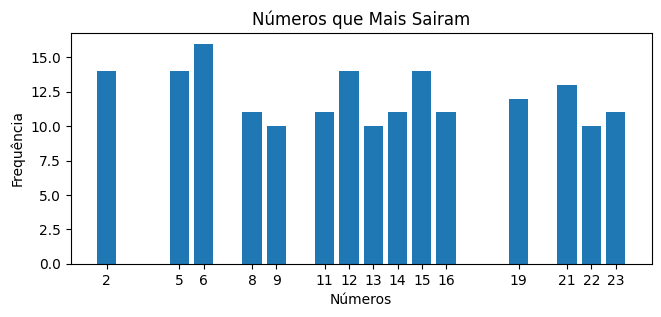

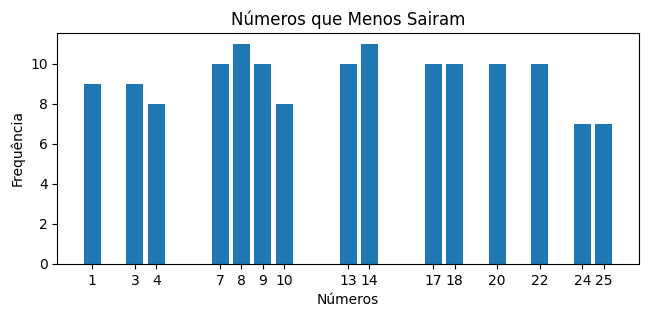


Olá! O que você deseja fazer?
1: Realizar novo sorteio
2: Analisar frequência dos números
3: Realizar sorteio com os números que mais sairam
4: Realizar sorteio com os números que menos sairam
5: Sair
Digite a opção desejada: 5
Boa sorte! Você pode ganhar. JSC sabe em qual JG!!.


In [8]:
import random
import json
from collections import Counter
import matplotlib.pyplot as plt

# Define a quantidade de números a serem sorteados
NUMEROS_SORTEADOS = 15

# Cria uma lista com os números de 1 a 25
numeros = list(range(1, 26))

# Carrega os resultados anteriores do arquivo JSON, se existir
try:
    with open("resultados_sorteios.json", "r") as f:
        resultados_anteriores = json.load(f)
except FileNotFoundError:
    resultados_anteriores = []

def realizar_sorteio():
    """Realiza um novo sorteio, garantindo que não seja repetido."""
    global resultados_anteriores
    while True:
        sorteio = random.sample(numeros, NUMEROS_SORTEADOS)
        if sorteio not in resultados_anteriores:
            resultados_anteriores.append(sorteio)
            print(f"Os números sorteados são: {sorteio}")
            return sorteio
        else:
            print("Sorteio repetido, tentando novamente...")

def salvar_resultados():
    """Salva todos os resultados dos sorteios em um arquivo JSON."""
    with open("resultados_sorteios.json", "w") as f:
        json.dump(resultados_anteriores, f)

def analisar_frequencia():
    """Analisa a frequência de números nos sorteios."""
    todos_numeros = [num for sublista in resultados_anteriores for num in sublista]
    contagem = Counter(todos_numeros)
    mais_comuns = contagem.most_common(NUMEROS_SORTEADOS)  # Números mais comuns
    menos_comuns = contagem.most_common()[:-NUMEROS_SORTEADOS-1:-1]  # Números menos comuns
    return mais_comuns, menos_comuns

def realizar_sorteio_especifico(numeros_disponiveis):
    """Realiza um sorteio usando apenas os números fornecidos."""
    sorteio = random.sample(numeros_disponiveis, NUMEROS_SORTEADOS)
    print(f"Os números sorteados são: {sorteio}")
    return sorteio

def plotar_grafico(data, titulo):
    """Plota um gráfico de barras com a frequência dos números."""
    numeros, frequencias = zip(*data)
    plt.figure(figsize=(7.5, 3))  # Reduzimos o tamanho pela metade
    plt.bar(numeros, frequencias)
    plt.xlabel("Números")
    plt.ylabel("Frequência")
    plt.title(titulo)
    plt.xticks(numeros)
    plt.show()

def chatbot():
    """Interage com o usuário para realizar e comparar sorteios."""
    while True:
        print("\nOlá! O que você deseja fazer?")
        print("1: Realizar novo sorteio")
        print("2: Analisar frequência dos números")
        print("3: Realizar sorteio com os números que mais sairam")
        print("4: Realizar sorteio com os números que menos sairam")
        print("5: Sair")
        opcao = input("Digite a opção desejada: ")
        if opcao == '1':
            sorteio = realizar_sorteio()
            salvar_resultados()
            print("Sorteio realizado com sucesso!")
        elif opcao == '2':
            if not resultados_anteriores:
                print("Realize pelo menos um sorteio antes de analisar a frequência.")
                continue
            mais_comuns, menos_comuns = analisar_frequencia()
            print("Números que mais sairam:")
            for numero, frequencia in mais_comuns:
                print(f"{numero}: {frequencia} vezes")
            print("\nNúmeros que menos sairam:")
            for numero, frequencia in menos_comuns:
                print(f"{numero}: {frequencia} vezes")
            plotar_grafico(mais_comuns, "Números que Mais Sairam")
            plotar_grafico(menos_comuns, "Números que Menos Sairam")
        elif opcao == '3':
            if not resultados_anteriores:
                print("Realize pelo menos um sorteio antes de realizar este sorteio.")
                continue
            mais_comuns, _ = analisar_frequencia()
            numeros_mais_comuns = [numero for numero, _ in mais_comuns]
            realizar_sorteio_especifico(numeros_mais_comuns)
        elif opcao == '4':
            if not resultados_anteriores:
                print("Realize pelo menos um sorteio antes de realizar este sorteio.")
                continue
            _, menos_comuns = analisar_frequencia()
            numeros_menos_comuns = [numero for numero, _ in menos_comuns]
            realizar_sorteio_especifico(numeros_menos_comuns)
        elif opcao == '5':
            print("Boa sorte! Você pode ganhar. JSC sabe em qual JG!!.")
            break
        else:
            print("Opção inválida. Tente novamente.")

# Realiza dois sorteios iniciais
realizar_sorteio()
realizar_sorteio()
salvar_resultados()

# Inicia o chatbot
chatbot()